# Clean And Analyze Employee Exit Surveys

# Introduction

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Below is a preview of a couple columns we'll work with from the dete_survey:

ID: An id used to identify the participant of the survey              
SeparationType: The reason why the person's employment ended          
Cease Date: The year or month the person's employment ended          
DETE Start Date: The year the person began employment with the DETE    

Below is a preview of a couple columns we'll work with from the tafe_survey:          

Record ID: An id used to identify the participant of the survey          
Reason for ceasing employment: The reason why the person's employment ended          
LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)          


# Posing Questions

In this analysis mission we'll try to answer these questions: 

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? 

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees? 


In [1]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read DETE survey
dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
#view
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

We have about 56 columns ,some have missing values.

In [4]:
#the count of missing values
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

View of some columns.

In [5]:
dete_survey['DETE Start Date'].value_counts(dropna = False)

Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
2013          21
1975          21
1970          21
2005          20
1990          20
1999          19
1996          19
2004          18
1991          18
1992          18
2000          18
1989          17
1976          15
2002          15
1978          15
2003          15
1988          15
1998          14
1974          14
1979          14
1995          14
1980          14
1997          14
1993          13
1986          12
1972          12
1977          11
1971          10
1994          10
1969          10
1984          10
2001          10
1983           9
1981           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64

In [6]:
dete_survey['Physical work environment'].value_counts(dropna = False)

False    806
True      16
Name: Physical work environment, dtype: int64

In [7]:
dete_survey['Communication'].value_counts(dropna = False)

A      399
SA     144
N      129
D       76
SD      58
M        8
NaN      8
Name: Communication, dtype: int64

In [8]:
dete_survey['Role Start Date'].value_counts(dropna = False)

Not Stated    98
2012          65
2011          57
2010          46
2008          45
2007          41
2013          41
2009          38
2006          25
2004          22
2003          20
2000          20
2005          20
1996          19
1999          19
1989          18
1992          17
2002          16
2001          15
1998          15
1988          14
1997          13
1995          13
1975          12
1990          12
1986          11
1978           9
1993           9
1976           9
1991           8
1994           7
1979           7
1985           6
1983           5
1987           5
1981           5
1982           4
1984           4
1980           3
1970           2
1977           2
1974           1
200            1
1973           1
1971           1
1972           1
Name: Role Start Date, dtype: int64

In [9]:
#read TAFE survey
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
#view
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [11]:
#count of missing values
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

We have about 72 columns ,some have missing values.

View of some columns.

In [12]:
tafe_survey['Contributing Factors. Ill Health'].value_counts(dropna = False)

-             403
NaN           265
Ill Health     34
Name: Contributing Factors. Ill Health, dtype: int64

In [13]:
tafe_survey['Contributing Factors. Ill Health'].value_counts(dropna = False)

-             403
NaN           265
Ill Health     34
Name: Contributing Factors. Ill Health, dtype: int64

Both data sets have over 50 columns, many of them have missing data, over 50% of the data are missing in some columns.

In addition, both data sets have common columns with different names.

In(dete_survey) date set some columns as (DETE Start Date and Role Start Date) have (Not Stated) values that indicate that values are missing ,we need to read the data set again to read these values as NaN.

# Data Cleaning

## Replace (Not Stated) With NaN

As we've mentioned (dete_survey) date set has some columns have (Not Stated)values that indicate that values are missing.       
We will read this data set one more time to fix this issue.


In [14]:
#read (dete_survey) again to read(Not Stated) as NaN
dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
#check
dete_survey['DETE Start Date'].value_counts(dropna = False)

NaN        73
 2011.0    40
 2007.0    34
 2008.0    31
 2010.0    27
 2012.0    27
 2009.0    24
 2006.0    23
 1970.0    21
 1975.0    21
 2013.0    21
 2005.0    20
 1990.0    20
 1999.0    19
 1996.0    19
 1992.0    18
 1991.0    18
 2000.0    18
 2004.0    18
 1989.0    17
 1978.0    15
 2003.0    15
 1988.0    15
 1976.0    15
 2002.0    15
 1974.0    14
 1997.0    14
 1998.0    14
 1979.0    14
 1995.0    14
 1980.0    14
 1993.0    13
 1972.0    12
 1986.0    12
 1977.0    11
 1971.0    10
 1984.0    10
 1994.0    10
 1969.0    10
 2001.0    10
 1983.0     9
 1981.0     9
 1973.0     8
 1985.0     8
 1987.0     7
 1982.0     4
 1963.0     4
 1968.0     3
 1967.0     2
 1965.0     1
 1966.0     1
Name: DETE Start Date, dtype: int64

## Drop Unneccessary Columns 

We have more than 50 columns in each data set,we will keep only columns that are needed in our analysis and that help us to answer questions about resigning and job dissatisfaction.

In [16]:
#list of col. before dropping
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [17]:
#drop unneccessary columns from (dete_survey)
dete_survey.drop(dete_survey.columns[28:49] ,axis = 1,inplace = True)

In [18]:
#check
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [19]:
#list of col. before dropping
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [20]:
#drop unneccessary columns
tafe_survey.drop(tafe_survey.columns[17:66] ,axis = 1 ,inplace = True)

In [21]:
#check
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

## Clean The Column Names

Sine we will merge the two date sets we need to insure the coulmn names are same...    
We will perforem the below steps in (date_survey) columns names         
1-Make all the capitalization lowercase.         
2-Remove any whitespace from the end of the strings.         
3-Replace spaces with underscores ('_').         

Then rename and update the columns namse in (tafe_survey) making the (date_survey) columns names as the base for nameing process.

In [22]:
#clean column names in (dete_survey) 
dete_survey.columns = dete_survey.columns.str.replace(' ','_').str.replace('/','_').str.lower().str.strip()

In [23]:
#check
dete_survey.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [24]:
#list of columns before the updating
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [25]:
#update and rename(tafe_survey) column names
tafe_survey.rename({'Record ID': 'id',
                    'CESSATION YEAR': 'cease_date',
                    'Reason for ceasing employment': 'separationtype',
                    'Gender. What is your Gender?': 'gender',
                    'CurrentAge. Current Age': 'age',
                    'Employment Type. Employment Type': 'employment_status',
                    'Classification. Classification': 'position',
                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                    },axis = 1,inplace = True)





In [26]:
#check
tafe_survey.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter The Data

In the column (separationtype) we have many types,and our questions are related to (Resignation) separation type,so in this step we will filter this column in both data sets and keep only this type.

In [27]:
#list of separation types in(dete_survey)
dete_survey['separationtype'].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [28]:
#filter(separationtype) col.

#regex pattern
pattern = r'Resignation'
#get rows that only have (Resignation) in (sperationtype) col
dete_resignations = dete_survey['separationtype'].str.contains(pattern)
#filter df
dete_survey = dete_survey[dete_resignations]
#check
dete_survey['separationtype'].value_counts(dropna = False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [29]:
#list of separation types in (tafe_survey)
tafe_survey['separationtype'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [30]:
#filter(separationtype) col.

#regex pattern
pattern = r'Resignation'
#get rows that only have (Resignation) in (sperationtype) col
#we have NaN in the col. we have to replace NaN by False
tafe_resignations = tafe_survey['separationtype'].str.contains(pattern , na = False)
#filter df
tafe_survey = tafe_survey[tafe_resignations]
#check
tafe_survey['separationtype'].value_counts(dropna = False)

Resignation    340
Name: separationtype, dtype: int64

## Verify Date Data

We'll verify and check the dates to don't contain any major errors or unreasonable years in (cease_date) and (dete_start_date) in date_survey and (cease_date) in tafe_survey

In [31]:
#list of (cease_date) in dete_survey
dete_survey['cease_date'].value_counts(dropna = False).sort_index()

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
NaN         11
Name: cease_date, dtype: int64

In [32]:
#clean (cease_date) col and extract the years
#convert from string into float
pattern = r'([0-9]{4})'
dete_survey['cease_date'] = dete_survey['cease_date'].str.extract(pattern).astype(float)

In [33]:
#check
dete_survey['cease_date'].value_counts(dropna = False).sort_index()

 2006.0      1
 2010.0      2
 2012.0    129
 2013.0    146
 2014.0     22
NaN         11
Name: cease_date, dtype: int64

In [34]:
#list of (dete_start_date)
dete_survey['dete_start_date'].value_counts(dropna = False).sort_index()

 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64

In [35]:
#list of (cease_date) in tafe_survey
tafe_survey['cease_date'].value_counts(dropna = False)

 2011.0    116
 2012.0     94
 2010.0     68
 2013.0     55
NaN          5
 2009.0      2
Name: cease_date, dtype: int64

We've found out there is no issues or unreasonable dates in these columns.

## Create A New Column (institute_service) in dete_survey 

For our coming analysis we need to know the length of time an employee spent in a workplace  that called years of service.    
tafe_survey is already has this column (institute_service) ,we need to create one for data_survey,so we can analyze both surveys.

We will calculate this new column by subtracting employment ended date (cease_date) from  employment began date (dete_start_date).

In [36]:
#create the new col.
dete_survey['institute_service'] = dete_survey['cease_date'] - dete_survey['dete_start_date']

In [37]:
#check
dete_survey['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees

We'll identify any employee who resigned due to some kind of dissatisfaction.     
First we'll select the columns that are needed to complete this task.

tafe_survey:         
Contributing Factors. Dissatisfaction         
Contributing Factors. Job Dissatisfaction         
         
dete_survey:         
job_dissatisfaction         
dissatisfaction_with_the_department         
physical_work_environment         
lack_of_recognition         
lack_of_job_security         
work_location         
employment_conditions         
work_life_balance         
workload         

If the employees indicated any of the factors above as (True), we'll mark them as dissatisfied in a new column.        

The new column(dissatisfied) will have :         
True if any element in the selected columns above is True         
False if none of the elements in the selected columns above is True         
NaN if the value is NaN

We'll work on tafe_survey data frame first.

In [38]:
#check 
tafe_survey[['Contributing Factors. Dissatisfaction',
             'Contributing Factors. Job Dissatisfaction']].head(20)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [39]:
#list of values
tafe_survey['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [40]:
#list of values
tafe_survey['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

First,we'll create a function to update the two above columns' values.     
The function will change the values as follow:     
If the value (-) update it into (False)     
If the value (NaN) keep it as (NaN)       
Otherwise update it into (True)         


In [41]:
#create a function to update these column values
#->False
#NaN > NaN
#otherwise >True

import numpy as np
#fun
def update_vals (value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

In [42]:
#apply the function on the two columns in (tafe_survey)
tafe_factors = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_survey[tafe_factors] = tafe_survey[tafe_factors].applymap(update_vals)

In [43]:
#check 
tafe_survey['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [44]:
#check
tafe_survey['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

After updating and changing the values ,now we will create the new column (dissatisfied) in  both data frames.

In [45]:
#create the (dissatisfied) col in (tafe_survey)

tafe_survey['dissatisfied'] = tafe_survey[['Contributing Factors. Dissatisfaction',
             'Contributing Factors. Job Dissatisfaction']].any(axis = 1 , skipna = False)
#check
tafe_survey['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Create the (dissatisfied) column in (dete_survey) data frame.

In [46]:
#create the (dissatisfied) col in (dete_survey)

#list of required columns
factors = ['job_dissatisfaction' ,'dissatisfaction_with_the_department',
           'physical_work_environment','lack_of_recognition',
           'lack_of_job_security','work_location','employment_conditions',
           'work_life_balance','workload']

#the new col
dete_survey['dissatisfied'] = dete_survey[factors].any(axis = 1 ,skipna = False)
#check
dete_survey['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

Intial visualization for whether the emplyees resigned case dissatisfaction factor or not.

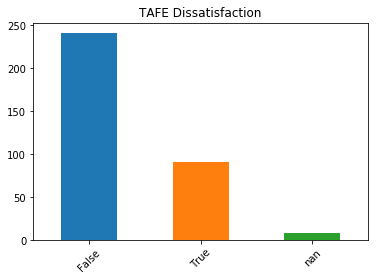

In [47]:
#chart for dissatisfaction (tafe_survey)
tafe_survey['dissatisfied'].value_counts(dropna = False).plot(kind ='bar',
                                                 title ='TAFE Dissatisfaction',rot = 45)
plt.show()

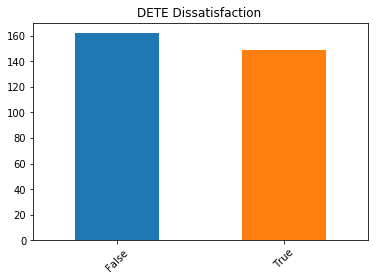

In [48]:
#chart for dissatisfaction (dete_survey)
dete_survey['dissatisfied'].value_counts(dropna = False).plot(kind ='bar',
                                        title ='DETE Dissatisfaction ',rot = 45)
plt.show()

We noice that in (tafe_survey) most of the employees resinged because another reason except dissatisfaction while (dete_survey) dissatisfaction and another reasons are almost equal.

## Combine The Two Data Frames

Add a column to distinguish between the two data sets.

In [49]:
#new col
dete_survey['institute'] = 'DETE'

In [50]:
#check
dete_survey.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [51]:
#new col
tafe_survey['institute'] = 'TAFE'

In [52]:
#check
tafe_survey.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


Combine the two data sets

In [53]:
combined = pd.concat([dete_survey,tafe_survey])

/Users/ahza/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


Drop columns with less than 500 non null values.

In [54]:
#list of columns and sum of theirs not null values
combined.notnull().sum()

Contributing Factors. Career Move - Private Sector     332
Contributing Factors. Career Move - Public Sector      332
Contributing Factors. Career Move - Self-employment    332
Contributing Factors. Dissatisfaction                  332
Contributing Factors. Ill Health                       332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Job Dissatisfaction              332
Contributing Factors. Maternity/Family                 332
Contributing Factors. NONE                             332
Contributing Factors. Other                            332
Contributing Factors. Study                            332
Contributing Factors. Travel                           332
Institute                                              340
WorkArea                                               340
aboriginal                                               7
age                                                    596
business_unit                                           

In [55]:
#drop columns with less than 500 non null values
combined.dropna(axis = 1,thresh = 500,inplace = True)

In [56]:
#check
combined.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype'],
      dtype='object')

## Clean The Service Column (institute_service)

In [57]:
#view of (institute_service)
combined['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [58]:
#view of (institute_service)
combined['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


This column contains values in different forms,before the analysis we'll distribute these numbers into categories ....

The categories are:     
New: Less than 3 years at a company     
Experienced: 3-6 years at a company     
Established: 7-10 years at a company     
Veteran: 11 or more years at a company  

First convert the series into string.

In [59]:
#convert from int into string
combined['institute_service'] = combined['institute_service'].astype('str')

In [60]:
#check
combined['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

In [61]:
#extract years of service
#and convert them into float 
combined['institute_service'] = combined['institute_service'].str.extract('(\d+)',expand = False).astype('float')
#check
combined['institute_service'].value_counts(dropna = False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [62]:
# New: Less than 3 years at a company
# Experienced: 3-6 years at a company
# Established: 7-10 years at a company
# Veteran: 11 or more years at a company

#fun
def categ(value):
    if pd.isnull(value):
        return np.nan
    elif value < 3:
        return 'New'
    elif value <= 6:
        return 'Experienced'
    elif value <= 10:
        return 'Established'
    else:
        return 'Veteran'
    
#a new column for the categories    
combined['service_cat'] = combined['institute_service'].apply(categ)    

In [63]:
#check
combined['service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

# Data Analysis

## Analysis The Years of Service And Dissatisfication

In this step we'll perform analysis on (dissatisfied) and (service_cat) columns and answer this question
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? 

But first we need to deal with missing values on (dissatisfied) column.

In [64]:
#view
combined['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We'll replace missing values with most frequent value,as we see the value is (False).

In [65]:
#replace nan by False
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

In [66]:
#check
combined['dissatisfied'].value_counts(dropna = False )

False    411
True     240
Name: dissatisfied, dtype: int64

Now the time for the analysis,
first calculate the percentage of (dissatisfied) employees in each (service_cat) group.

Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. 

In [67]:
#calculate the percentage
diss_serv = combined.pivot_table('dissatisfied','service_cat')
diss_serv

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


Now plot and chart of above calculation.

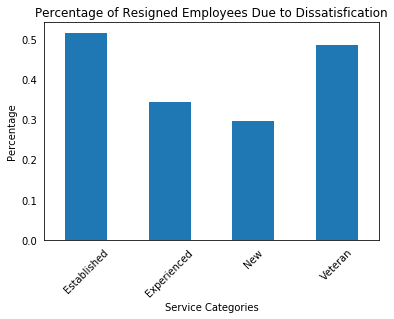

In [78]:
#chart
diss_serv.plot(kind = 'bar',title = "Percentage of Resigned Employees Due to Dissatisfication",
              legend = False ,rot = 45)

plt.xlabel('Service Categories')
plt.ylabel('Percentage')
plt.tick_params(bottom ='False',left ='False')
plt.show()



it seems people with long service and experience are more likely to resign due to some kind of dissatisfication.

## Analysis The Age And Dissatisfication


* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [69]:
#view
combined['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Clean the age column first.

In [70]:
#convert into string
combined['age'] = combined['age'].astype('str')

In [71]:
#extract the ages and convert them into float
combined['age'] = combined['age'].str.extract('(\d+)' ,expand = False).astype('float')

In [72]:
#check
combined['age'].value_counts(dropna = False)

 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: age, dtype: int64

We'll create 6 categories for the ages:         
20 or younger         
21-30         
31-40         
41-50         
51-60         
61 or older         

In [73]:
#fun
def age_cat(age):
    if pd.isnull(age): 
        return np.nan   
    elif age <= 20:
        return '20 or younger'
    elif age <= 30:
        return '21-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '61 or older'

In [74]:
#apply the function on the new col (age_cat)
combined['age_cat'] = combined['age'].apply(age_cat)

In [75]:
#check
combined['age_cat'].value_counts(dropna = False)

41-50            174
31-40            134
21-30            129
51-60            126
NaN               55
61 or older       23
20 or younger     10
Name: age_cat, dtype: int64

Now the time for the analysis.

What is the percentage of people in each age group who resigned due to some kind of dissatisfaction?

In [76]:
#percentage
combined.pivot_table('dissatisfied','age_cat')

,dissatisfied
age_cat,
20 or younger,0.200000
21-30,0.364341
31-40,0.358209
41-50,0.379310
51-60,0.404762
61 or older,0.521739


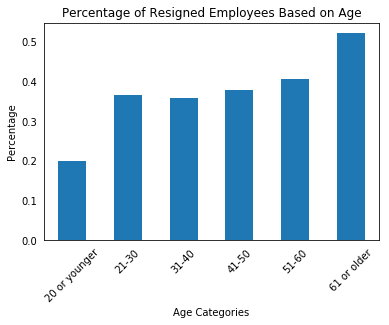

In [79]:
#chart
combined.pivot_table('dissatisfied','age_cat').plot(kind ='bar',
        title = "Percentage of Resigned Employees Based on Age",legend = False ,rot = 45)

plt.xlabel('Age Categories')
plt.ylabel('Percentage')
plt.tick_params(bottom ='False',left ='False')
plt.show()


When the employees get older they are more likely to resign due to some kind of dissatisfaction.

# Conclusions

Based on the pervious analysis:
* The employees are more likely to resign due to some kind of dissatisfaction if they have long years of service, while the fresh or new employees are less likely to resign.        
* There is a relation between age and resigning, as the age is increasing the resigning is increasing, when employees get older they are more likely to resign due to some kind of dissatisfaction.